In [1]:
import pandas as pd
data=pd.read_csv('monthly.csv')
data

,Unnamed: 0,Issuance Date,Quantity
0,0,2012-01-31,667216.0
1,1,2012-02-29,1282126.0
2,2,2012-03-31,1623892.0
3,3,2012-04-30,700471.0
4,4,2012-05-31,796233.0
...,...,...,...
103,103,2020-08-31,1472165.0
104,104,2020-09-30,2482808.0
105,105,2020-10-31,1699757.0
106,106,2020-11-30,1957542.0


In [2]:
data.drop('Unnamed: 0', axis = 1)

,Issuance Date,Quantity
0,2012-01-31,667216.0
1,2012-02-29,1282126.0
2,2012-03-31,1623892.0
3,2012-04-30,700471.0
4,2012-05-31,796233.0
...,...,...
103,2020-08-31,1472165.0
104,2020-09-30,2482808.0
105,2020-10-31,1699757.0
106,2020-11-30,1957542.0


In [3]:
data.set_index('Issuance Date', inplace=True)

In [4]:
data = data.drop('Unnamed: 0', axis = 1)
data

,Quantity
Issuance Date,
2012-01-31,667216.0
2012-02-29,1282126.0
2012-03-31,1623892.0
2012-04-30,700471.0
2012-05-31,796233.0
...,...
2020-08-31,1472165.0
2020-09-30,2482808.0
2020-10-31,1699757.0


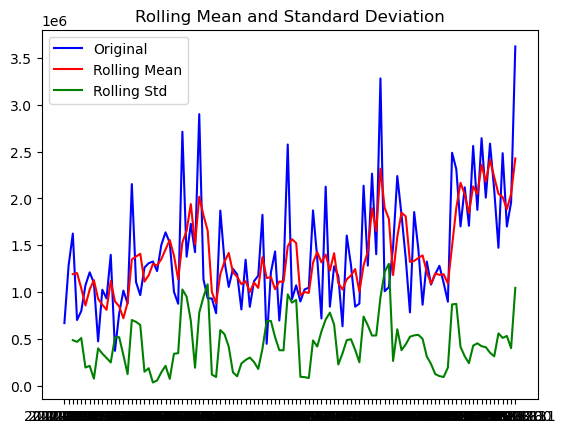

In [5]:
import matplotlib.pyplot as plt

rolling_mean = data['Quantity'].rolling(window=3).mean()
rolling_std = data['Quantity'].rolling(window=3).std()

plt.plot(data['Quantity'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='green', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show()

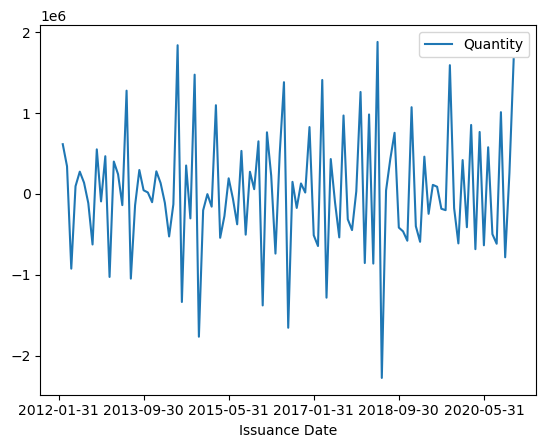

In [6]:
df_diff = data.diff(periods=1)

# Plot the differenced time series to visualize its stationarity
df_diff.plot()

# Remove any NaN values caused by differencing
df_diff = df_diff.dropna()

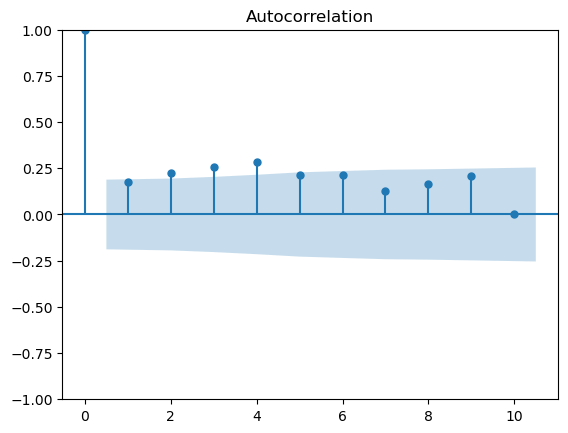

C:\Users\12269\anaconda3\envs\DAB300\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


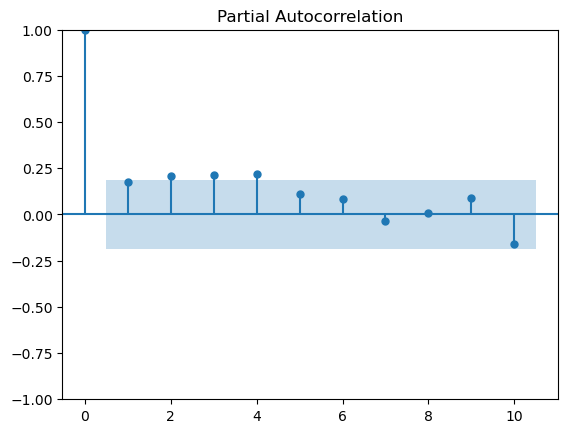

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data, lags=10)
plt.show()

plot_pacf(data, lags=10)
plt.show()

In [12]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_diff, order=(1,1,1))
results = model.fit()

predictions = results.predict(start='2020-01-31', end='2020-12-31')
print(predictions)
print (len(predictions))

2020-01-31   -200243.710437
2020-02-29    237269.737959
2020-03-31   -425635.459202
2020-04-30    385680.511728
2020-05-31   -378253.912217
2020-06-30    361785.510631
2020-07-31   -278443.881076
2020-08-31    288663.525153
2020-09-30    341065.550126
2020-10-31   -513931.299143
2020-11-30    434441.772945
2020-12-31   -119719.523402
Freq: M, Name: predicted_mean, dtype: float64
12


C:\Users\12269\anaconda3\envs\DAB300\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\12269\anaconda3\envs\DAB300\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\12269\anaconda3\envs\DAB300\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [14]:
import numpy as np
y_test = np.array(data.tail(12))
y_test

array([[1707288.],
       [2559851.],
       [1877089.],
       [2643089.],
       [2008222.],
       [2585097.],
       [2088028.],
       [1472165.],
       [2482808.],
       [1699757.],
       [1957542.],
       [3623143.]])

In [15]:
predictions = np.array(predictions)
predictions

array([-200243.71043677,  237269.73795908, -425635.4592016 ,
        385680.51172773, -378253.91221732,  361785.5106312 ,
       -278443.88107552,  288663.52515277,  341065.55012595,
       -513931.2991434 ,  434441.77294501, -119719.523402  ])

In [16]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
mean = np.mean(y_test)
percent_mae = mae/mean *100
percent_mae

99.50315147335672

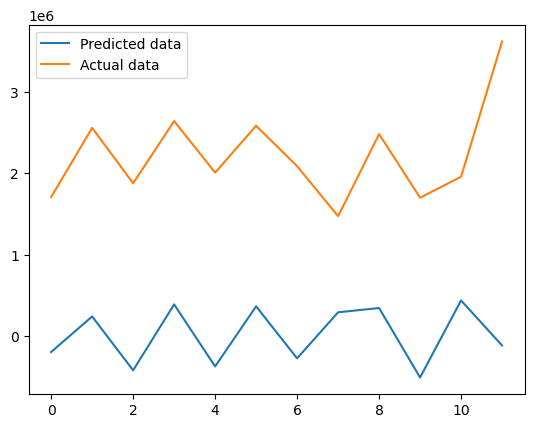

In [17]:
import matplotlib.pyplot as plt
plt.plot(predictions, label = 'Predicted data')
plt.plot(y_test, label = 'Actual data')
plt.legend()
plt.show()